In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP


# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']
config_dir = os.path.join('configs')

## Simple Mean Experiment 

In [4]:
with open(os.path.join(config_dir,'multivariate_gp_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

In [5]:
default_conf

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 4,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'fix_num_contxt': False,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.GaussianProcess',
  'num_instances_train': 64,
  'num_instances_vali': 10,
  'num_instances_test': 10,
  'noise': 0.0004,
  'length_scale': 0.4,
  'gamma': 1},
 'experiment_params': {'dim_observation': 400,
  'lr': 0.001,
  'n_epochs': 200000,
  'range_x': [-2, 2],
  'seed': None,
  'dimx': 4,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 3,
  'batch_size_test': 3,
  'plotting': True,
  'print_after': 1000}}

In [6]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=132, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=5, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
None


In [7]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

In [ ]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

  0%|          | 7/200000 [00:00<2:33:32, 21.71it/s]

Mean training loss at epoch 0 :                         1.416
Mean Validation loss after 0 equals                     1.417

Validation loss for the function plotted:                 1.441


  1%|          | 1006/200000 [00:29<1:19:27, 41.74it/s]

Mean training loss at epoch 1000 :                         1.248
Mean Validation loss after 1000 equals                     1.571

Validation loss for the function plotted:                 1.463


  1%|          | 2005/200000 [00:56<1:13:16, 45.03it/s]

Mean training loss at epoch 2000 :                         1.303
Mean Validation loss after 2000 equals                     1.514

Validation loss for the function plotted:                 1.569


  2%|▏         | 3005/200000 [01:18<1:15:48, 43.31it/s]

Mean training loss at epoch 3000 :                         1.291
Mean Validation loss after 3000 equals                     1.763

Validation loss for the function plotted:                 2.131


  2%|▏         | 4006/200000 [01:42<1:12:05, 45.31it/s]

Mean training loss at epoch 4000 :                         1.3
Mean Validation loss after 4000 equals                     2.382

Validation loss for the function plotted:                 2.934


  3%|▎         | 5008/200000 [02:06<1:14:06, 43.86it/s]

Mean training loss at epoch 5000 :                         0.848
Mean Validation loss after 5000 equals                     1.667

Validation loss for the function plotted:                 1.338


  3%|▎         | 6005/200000 [02:35<1:15:45, 42.68it/s]

Mean training loss at epoch 6000 :                         1.384
Mean Validation loss after 6000 equals                     1.666

Validation loss for the function plotted:                 1.49


  4%|▎         | 7005/200000 [03:03<1:56:25, 27.63it/s]

Mean training loss at epoch 7000 :                         1.413
Mean Validation loss after 7000 equals                     1.82

Validation loss for the function plotted:                 1.726


  4%|▍         | 8007/200000 [03:28<1:27:30, 36.56it/s]

Mean training loss at epoch 8000 :                         1.148
Mean Validation loss after 8000 equals                     1.598

Validation loss for the function plotted:                 1.356


  5%|▍         | 9008/200000 [03:54<1:14:53, 42.50it/s]

Mean training loss at epoch 9000 :                         1.258
Mean Validation loss after 9000 equals                     1.552

Validation loss for the function plotted:                 1.678


  5%|▌         | 10009/200000 [04:18<1:10:06, 45.17it/s]

Mean training loss at epoch 10000 :                         1.059
Mean Validation loss after 10000 equals                     1.589

Validation loss for the function plotted:                 1.385


  6%|▌         | 11006/200000 [04:40<1:12:57, 43.17it/s]

Mean training loss at epoch 11000 :                         1.34
Mean Validation loss after 11000 equals                     1.989

Validation loss for the function plotted:                 3.072


  6%|▌         | 12007/200000 [05:03<1:11:18, 43.94it/s]

Mean training loss at epoch 12000 :                         1.218
Mean Validation loss after 12000 equals                     1.633

Validation loss for the function plotted:                 1.534


  7%|▋         | 13006/200000 [05:27<1:11:22, 43.66it/s]

Mean training loss at epoch 13000 :                         1.094
Mean Validation loss after 13000 equals                     1.634

Validation loss for the function plotted:                 1.504


  7%|▋         | 14008/200000 [05:53<1:22:00, 37.80it/s]

Mean training loss at epoch 14000 :                         1.154
Mean Validation loss after 14000 equals                     2.168

Validation loss for the function plotted:                 1.446


  8%|▊         | 15009/200000 [06:23<1:10:02, 44.02it/s]

Mean training loss at epoch 15000 :                         1.324
Mean Validation loss after 15000 equals                     2.285

Validation loss for the function plotted:                 2.745


  8%|▊         | 16007/200000 [06:45<1:16:44, 39.96it/s]

Mean training loss at epoch 16000 :                         1.342
Mean Validation loss after 16000 equals                     1.661

Validation loss for the function plotted:                 1.614


  9%|▊         | 17009/200000 [07:09<1:32:09, 33.09it/s]

Mean training loss at epoch 17000 :                         1.328
Mean Validation loss after 17000 equals                     1.671

Validation loss for the function plotted:                 1.63


  9%|▉         | 18009/200000 [07:34<1:08:44, 44.12it/s]

Mean training loss at epoch 18000 :                         1.332
Mean Validation loss after 18000 equals                     1.747

Validation loss for the function plotted:                 2.126


 10%|▉         | 19005/200000 [07:56<1:21:56, 36.81it/s]

Mean training loss at epoch 19000 :                         1.504
Mean Validation loss after 19000 equals                     1.676

Validation loss for the function plotted:                 1.412


 10%|█         | 20005/200000 [08:23<1:10:22, 42.62it/s]

Mean training loss at epoch 20000 :                         1.142
Mean Validation loss after 20000 equals                     1.759

Validation loss for the function plotted:                 1.524


 11%|█         | 21006/200000 [08:48<1:36:25, 30.94it/s]

Mean training loss at epoch 21000 :                         1.045
Mean Validation loss after 21000 equals                     1.651

Validation loss for the function plotted:                 1.65


 11%|█         | 22004/200000 [09:21<1:41:08, 29.33it/s]

Mean training loss at epoch 22000 :                         1.376
Mean Validation loss after 22000 equals                     1.896

Validation loss for the function plotted:                 3.069


 12%|█▏        | 23006/200000 [09:59<2:05:26, 23.52it/s]

Mean training loss at epoch 23000 :                         1.091
Mean Validation loss after 23000 equals                     1.699

Validation loss for the function plotted:                 1.96


 12%|█▏        | 24004/200000 [10:38<1:15:00, 39.11it/s] 

Mean training loss at epoch 24000 :                         1.318
Mean Validation loss after 24000 equals                     1.647

Validation loss for the function plotted:                 1.386


 13%|█▎        | 25006/200000 [11:02<1:04:36, 45.14it/s]

Mean training loss at epoch 25000 :                         1.684
Mean Validation loss after 25000 equals                     1.752

Validation loss for the function plotted:                 1.823


 13%|█▎        | 26003/200000 [11:25<1:23:08, 34.88it/s]

Mean training loss at epoch 26000 :                         1.282
Mean Validation loss after 26000 equals                     1.692

Validation loss for the function plotted:                 1.739


 14%|█▎        | 27004/200000 [11:56<1:29:38, 32.16it/s]

Mean training loss at epoch 27000 :                         1.225
Mean Validation loss after 27000 equals                     1.961

Validation loss for the function plotted:                 1.756


 14%|█▍        | 28005/200000 [12:26<1:09:07, 41.47it/s]

Mean training loss at epoch 28000 :                         0.739
Mean Validation loss after 28000 equals                     1.974

Validation loss for the function plotted:                 2.129


 15%|█▍        | 29005/200000 [12:51<1:43:38, 27.50it/s]

Mean training loss at epoch 29000 :                         1.4
Mean Validation loss after 29000 equals                     1.989

Validation loss for the function plotted:                 2.206


 15%|█▌        | 30005/200000 [13:24<1:09:55, 40.52it/s] 

Mean training loss at epoch 30000 :                         1.392
Mean Validation loss after 30000 equals                     1.937

Validation loss for the function plotted:                 1.848


 16%|█▌        | 31007/200000 [13:53<1:18:40, 35.80it/s]

Mean training loss at epoch 31000 :                         1.151
Mean Validation loss after 31000 equals                     1.982

Validation loss for the function plotted:                 1.939


 16%|█▌        | 32008/200000 [14:22<1:05:34, 42.69it/s]

Mean training loss at epoch 32000 :                         1.236
Mean Validation loss after 32000 equals                     2.017

Validation loss for the function plotted:                 1.777


 17%|█▋        | 33005/200000 [14:47<1:11:49, 38.75it/s]

Mean training loss at epoch 33000 :                         0.903
Mean Validation loss after 33000 equals                     1.977

Validation loss for the function plotted:                 1.812


 17%|█▋        | 34004/200000 [15:12<2:07:12, 21.75it/s]

Mean training loss at epoch 34000 :                         0.805
Mean Validation loss after 34000 equals                     1.896

Validation loss for the function plotted:                 1.918


 18%|█▊        | 35004/200000 [15:36<1:06:21, 41.44it/s]

Mean training loss at epoch 35000 :                         1.018
Mean Validation loss after 35000 equals                     2.002

Validation loss for the function plotted:                 2.097


 18%|█▊        | 36008/200000 [16:01<1:07:50, 40.29it/s]

Mean training loss at epoch 36000 :                         0.545
Mean Validation loss after 36000 equals                     1.795

Validation loss for the function plotted:                 1.703


 19%|█▊        | 37009/200000 [16:24<1:00:12, 45.12it/s]

Mean training loss at epoch 37000 :                         0.717
Mean Validation loss after 37000 equals                     2.317

Validation loss for the function plotted:                 1.764


 19%|█▉        | 38008/200000 [16:52<1:05:49, 41.02it/s]

Mean training loss at epoch 38000 :                         1.148
Mean Validation loss after 38000 equals                     2.191

Validation loss for the function plotted:                 2.902


 20%|█▉        | 39008/200000 [17:25<1:02:46, 42.74it/s]

Mean training loss at epoch 39000 :                         1.871
Mean Validation loss after 39000 equals                     2.461

Validation loss for the function plotted:                 2.209


 20%|██        | 40007/200000 [17:49<1:08:04, 39.17it/s]

Mean training loss at epoch 40000 :                         1.17
Mean Validation loss after 40000 equals                     2.376

Validation loss for the function plotted:                 1.978


 21%|██        | 41008/200000 [18:21<1:01:52, 42.82it/s]

Mean training loss at epoch 41000 :                         0.424
Mean Validation loss after 41000 equals                     2.732

Validation loss for the function plotted:                 4.232


 21%|██        | 42006/200000 [18:46<1:11:59, 36.58it/s]

Mean training loss at epoch 42000 :                         0.823
Mean Validation loss after 42000 equals                     2.053

Validation loss for the function plotted:                 1.52


 22%|██▏       | 43007/200000 [19:15<1:09:45, 37.50it/s]

Mean training loss at epoch 43000 :                         1.005
Mean Validation loss after 43000 equals                     2.539

Validation loss for the function plotted:                 3.103


 22%|██▏       | 44005/200000 [19:43<1:21:12, 32.01it/s]

Mean training loss at epoch 44000 :                         0.903
Mean Validation loss after 44000 equals                     1.848

Validation loss for the function plotted:                 1.68


 23%|██▎       | 45003/200000 [20:10<1:21:05, 31.86it/s]

Mean training loss at epoch 45000 :                         0.727
Mean Validation loss after 45000 equals                     1.878

Validation loss for the function plotted:                 1.887


 23%|██▎       | 46005/200000 [20:37<58:19, 44.01it/s]  

Mean training loss at epoch 46000 :                         -0.182
Mean Validation loss after 46000 equals                     2.854

Validation loss for the function plotted:                 2.983


 24%|██▎       | 47006/200000 [21:00<59:08, 43.11it/s]  

Mean training loss at epoch 47000 :                         0.675
Mean Validation loss after 47000 equals                     2.381

Validation loss for the function plotted:                 1.811


 24%|██▍       | 48009/200000 [21:25<58:04, 43.61it/s]  

Mean training loss at epoch 48000 :                         0.712
Mean Validation loss after 48000 equals                     1.849

Validation loss for the function plotted:                 1.565


 25%|██▍       | 49008/200000 [21:48<59:52, 42.03it/s]  

Mean training loss at epoch 49000 :                         0.736
Mean Validation loss after 49000 equals                     2.347

Validation loss for the function plotted:                 2.625


 25%|██▌       | 50006/200000 [22:13<55:58, 44.66it/s]  

Mean training loss at epoch 50000 :                         0.678
Mean Validation loss after 50000 equals                     2.55

Validation loss for the function plotted:                 1.989


 26%|██▌       | 51009/200000 [22:36<53:54, 46.06it/s]  

Mean training loss at epoch 51000 :                         0.017
Mean Validation loss after 51000 equals                     2.226

Validation loss for the function plotted:                 2.195


 26%|██▌       | 52005/200000 [22:59<56:55, 43.32it/s]  

Mean training loss at epoch 52000 :                         0.264
Mean Validation loss after 52000 equals                     1.894

Validation loss for the function plotted:                 1.822


 27%|██▋       | 53006/200000 [23:23<58:25, 41.94it/s]  

Mean training loss at epoch 53000 :                         0.899
Mean Validation loss after 53000 equals                     2.177

Validation loss for the function plotted:                 2.051


 27%|██▋       | 54006/200000 [23:46<54:26, 44.70it/s]  

Mean training loss at epoch 54000 :                         0.345
Mean Validation loss after 54000 equals                     2.008

Validation loss for the function plotted:                 1.602


 28%|██▊       | 55006/200000 [24:09<1:05:21, 36.97it/s]

Mean training loss at epoch 55000 :                         0.405
Mean Validation loss after 55000 equals                     3.03

Validation loss for the function plotted:                 2.697


 28%|██▊       | 56005/200000 [24:37<1:01:16, 39.17it/s]

Mean training loss at epoch 56000 :                         0.813
Mean Validation loss after 56000 equals                     2.657

Validation loss for the function plotted:                 3.561


 29%|██▊       | 57005/200000 [25:08<1:42:25, 23.27it/s]

Mean training loss at epoch 57000 :                         0.728
Mean Validation loss after 57000 equals                     1.949

Validation loss for the function plotted:                 2.237


 29%|██▉       | 58007/200000 [25:33<52:58, 44.67it/s]  

Mean training loss at epoch 58000 :                         0.271
Mean Validation loss after 58000 equals                     2.065

Validation loss for the function plotted:                 2.067


 30%|██▉       | 59005/200000 [25:55<59:14, 39.66it/s]  

Mean training loss at epoch 59000 :                         1.138
Mean Validation loss after 59000 equals                     2.843

Validation loss for the function plotted:                 1.742


 30%|███       | 60008/200000 [26:19<53:35, 43.53it/s]  

Mean training loss at epoch 60000 :                         0.465
Mean Validation loss after 60000 equals                     2.349

Validation loss for the function plotted:                 3.13


 31%|███       | 61005/200000 [26:40<52:19, 44.28it/s]

Mean training loss at epoch 61000 :                         1.006
Mean Validation loss after 61000 equals                     2.158

Validation loss for the function plotted:                 2.072


 31%|███       | 62005/200000 [27:04<57:12, 40.20it/s]  

Mean training loss at epoch 62000 :                         0.534
Mean Validation loss after 62000 equals                     2.441

Validation loss for the function plotted:                 1.785


 32%|███▏      | 63009/200000 [27:28<49:21, 46.25it/s]  

Mean training loss at epoch 63000 :                         0.361
Mean Validation loss after 63000 equals                     1.891

Validation loss for the function plotted:                 1.694


 32%|███▏      | 64006/200000 [27:52<50:11, 45.16it/s]  

Mean training loss at epoch 64000 :                         0.011
Mean Validation loss after 64000 equals                     2.641

Validation loss for the function plotted:                 3.567


 33%|███▎      | 65007/200000 [28:15<49:02, 45.88it/s]  

Mean training loss at epoch 65000 :                         1.041
Mean Validation loss after 65000 equals                     1.886

Validation loss for the function plotted:                 1.615


 33%|███▎      | 66009/200000 [28:38<51:13, 43.59it/s]  

Mean training loss at epoch 66000 :                         0.979
Mean Validation loss after 66000 equals                     2.275

Validation loss for the function plotted:                 2.376


 34%|███▎      | 67008/200000 [29:02<53:20, 41.56it/s]  

Mean training loss at epoch 67000 :                         0.968
Mean Validation loss after 67000 equals                     2.289

Validation loss for the function plotted:                 1.918


 34%|███▍      | 68006/200000 [29:33<59:13, 37.14it/s]  

Mean training loss at epoch 68000 :                         1.009
Mean Validation loss after 68000 equals                     2.916

Validation loss for the function plotted:                 2.376


 35%|███▍      | 69008/200000 [29:59<50:21, 43.36it/s]  

Mean training loss at epoch 69000 :                         1.834
Mean Validation loss after 69000 equals                     1.992

Validation loss for the function plotted:                 2.032


 35%|███▌      | 70004/200000 [30:22<1:00:43, 35.67it/s]

Mean training loss at epoch 70000 :                         1.244
Mean Validation loss after 70000 equals                     1.998

Validation loss for the function plotted:                 1.673


 36%|███▌      | 71006/200000 [30:44<1:03:27, 33.88it/s]

Mean training loss at epoch 71000 :                         0.356
Mean Validation loss after 71000 equals                     2.604

Validation loss for the function plotted:                 1.898


 36%|███▌      | 72007/200000 [31:11<49:24, 43.17it/s]  

Mean training loss at epoch 72000 :                         0.767
Mean Validation loss after 72000 equals                     2.481

Validation loss for the function plotted:                 1.648


 37%|███▋      | 73007/200000 [31:34<49:59, 42.34it/s]

Mean training loss at epoch 73000 :                         0.781
Mean Validation loss after 73000 equals                     2.24

Validation loss for the function plotted:                 1.912


 37%|███▋      | 74006/200000 [31:57<53:34, 39.19it/s]

Mean training loss at epoch 74000 :                         1.173
Mean Validation loss after 74000 equals                     2.477

Validation loss for the function plotted:                 2.621


 38%|███▊      | 75009/200000 [32:21<49:27, 42.12it/s]

Mean training loss at epoch 75000 :                         0.975
Mean Validation loss after 75000 equals                     2.612

Validation loss for the function plotted:                 1.581


 38%|███▊      | 76006/200000 [32:45<55:42, 37.10it/s]

Mean training loss at epoch 76000 :                         0.71
Mean Validation loss after 76000 equals                     2.27

Validation loss for the function plotted:                 1.869


 39%|███▊      | 77004/200000 [33:08<49:14, 41.62it/s]  

Mean training loss at epoch 77000 :                         2.478
Mean Validation loss after 77000 equals                     2.22

Validation loss for the function plotted:                 2.501


 39%|███▉      | 78005/200000 [33:31<47:07, 43.15it/s]

Mean training loss at epoch 78000 :                         1.14
Mean Validation loss after 78000 equals                     2.531

Validation loss for the function plotted:                 2.647


 40%|███▉      | 79009/200000 [33:55<45:42, 44.12it/s]  

Mean training loss at epoch 79000 :                         0.866
Mean Validation loss after 79000 equals                     4.358

Validation loss for the function plotted:                 4.595


 40%|████      | 80009/200000 [34:20<45:53, 43.57it/s]  

Mean training loss at epoch 80000 :                         0.309
Mean Validation loss after 80000 equals                     2.375

Validation loss for the function plotted:                 2.836


 41%|████      | 81003/200000 [34:47<1:16:11, 26.03it/s]

Mean training loss at epoch 81000 :                         0.745
Mean Validation loss after 81000 equals                     2.87

Validation loss for the function plotted:                 3.112


 41%|████      | 82006/200000 [35:16<57:32, 34.18it/s]  

Mean training loss at epoch 82000 :                         1.046
Mean Validation loss after 82000 equals                     2.503

Validation loss for the function plotted:                 2.155


 42%|████▏     | 83006/200000 [35:42<42:43, 45.64it/s]  

Mean training loss at epoch 83000 :                         0.478
Mean Validation loss after 83000 equals                     3.61

Validation loss for the function plotted:                 2.034


 42%|████▏     | 84005/200000 [36:05<47:11, 40.96it/s]  

Mean training loss at epoch 84000 :                         0.187
Mean Validation loss after 84000 equals                     2.306

Validation loss for the function plotted:                 2.032


 43%|████▎     | 85008/200000 [36:28<45:44, 41.90it/s]

Mean training loss at epoch 85000 :                         0.861
Mean Validation loss after 85000 equals                     2.255

Validation loss for the function plotted:                 1.698


 43%|████▎     | 86008/200000 [36:51<45:46, 41.50it/s]  

Mean training loss at epoch 86000 :                         0.847
Mean Validation loss after 86000 equals                     2.259

Validation loss for the function plotted:                 1.852


 44%|████▎     | 87005/200000 [37:13<51:54, 36.28it/s]  

Mean training loss at epoch 87000 :                         1.558
Mean Validation loss after 87000 equals                     2.555

Validation loss for the function plotted:                 2.141


 44%|████▍     | 88008/200000 [37:36<44:41, 41.76it/s]

Mean training loss at epoch 88000 :                         0.506
Mean Validation loss after 88000 equals                     2.509

Validation loss for the function plotted:                 1.939


 45%|████▍     | 89003/200000 [37:58<47:02, 39.33it/s]

Mean training loss at epoch 89000 :                         1.049
Mean Validation loss after 89000 equals                     2.442

Validation loss for the function plotted:                 2.066


 45%|████▌     | 90005/200000 [38:30<47:43, 38.41it/s]  

Mean training loss at epoch 90000 :                         1.894
Mean Validation loss after 90000 equals                     2.49

Validation loss for the function plotted:                 2.259


 46%|████▌     | 91006/200000 [38:53<42:19, 42.92it/s]  

Mean training loss at epoch 91000 :                         0.557
Mean Validation loss after 91000 equals                     2.21

Validation loss for the function plotted:                 2.297


 46%|████▌     | 92004/200000 [39:16<43:20, 41.53it/s]

Mean training loss at epoch 92000 :                         1.235
Mean Validation loss after 92000 equals                     2.019

Validation loss for the function plotted:                 1.709


 47%|████▋     | 93010/200000 [39:39<39:46, 44.83it/s]

Mean training loss at epoch 93000 :                         0.825
Mean Validation loss after 93000 equals                     2.412

Validation loss for the function plotted:                 1.74


 47%|████▋     | 94008/200000 [40:02<47:30, 37.18it/s]  

Mean training loss at epoch 94000 :                         0.417
Mean Validation loss after 94000 equals                     2.535

Validation loss for the function plotted:                 2.516


 48%|████▊     | 95004/200000 [40:24<40:28, 43.24it/s]

Mean training loss at epoch 95000 :                         0.346
Mean Validation loss after 95000 equals                     2.545

Validation loss for the function plotted:                 2.714


 48%|████▊     | 95757/200000 [40:41<36:30, 47.59it/s]

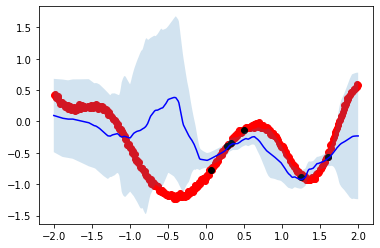

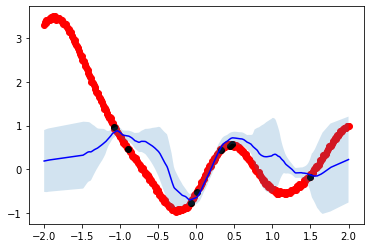

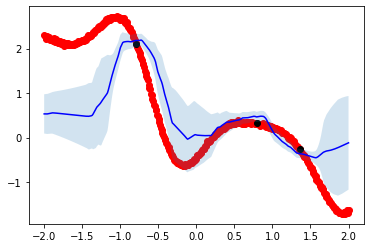

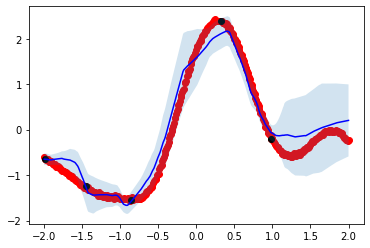

0.40400904417037964


In [11]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [26]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss, MSE]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results('', '1dpaper_simple_mean_agregation', to_save)


In [24]:
google_colab

'yes'

In [21]:
!ls 

architecture_improvement  neural_processes.egg-info  setup.py
cnp			  notebooks		     test
configs			  notes			     tests
data			  README.md		     tfm
experiments		  requirements_local.txt
LICENSE			  requirements.txt


In [22]:
! rmdir test